In [49]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
%matplotlib inline

resp = requests.get("https://en.wikipedia.org/wiki/Captain_America:_The_First_Avenger")
soup = BeautifulSoup(resp.content, "html.parser")

In [18]:
ls = []

for link in soup.findAll('a'):
    ls.append(link.get('href'))
    
ls.count("/wiki/Iron_Man_(2008_film)")

3

In [72]:
movie_links = ["Captain_America:_The_First_Avenger", "Iron_Man_(2008_film)", "The_Incredible_Hulk_(film)", "Iron_Man_2", "Thor_(film)", "The_Avengers_(2012_film)",
              "Iron_Man_3", "Thor:_The_Dark_World", "Captain_America:_The_Winter_Soldier", "Guardians_of_the_Galaxy_(film)",
              "Guardians_of_the_Galaxy_Vol._2", "Avengers:_Age_of_Ultron", "Ant-Man_(film)", "Captain_America:_Civil_War",
              "Spider-Man:_Homecoming", "Doctor_Strange_(2016_film)", "Thor:_Ragnarok", "Black_Panther_(film)", "Avengers:_Infinity_War",
              "Ant-Man_and_the_Wasp", "Captain_Marvel_(film)", "Avengers:_Endgame"]

total_mat = []
for link in movie_links:
    cur_ls = []
    resp = requests.get("https://en.wikipedia.org/wiki/" + link)
    soup = BeautifulSoup(resp.content, "html.parser")
    for link2 in movie_links:
        ls = []
        for link in soup.findAll('a'):
            ls.append(link.get('href'))
        cur_ls.append(ls.count("/wiki/" + link2))
    total_mat.append(cur_ls)
    

In [79]:
df = pd.DataFrame.from_records(total_mat)
df.sum(axis=1)
df2 = df.divide(df.sum(axis=1),axis = 0)

In [46]:
import numpy as np
def solveStationary( A ):
    """ x = xA where x is the answer
    x - xA = 0
    x( I - A ) = 0 and sum(x) = 1
    """
    n = A.shape[0]
    a = np.eye( n ) - A
    a = np.vstack( (a.T, np.ones( n )) )
    b = np.matrix( [0] * n + [ 1 ] ).T
    return np.linalg.lstsq( a, b )[0]

In [47]:
solveStationary(df2)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  # This is added back by InteractiveShellApp.init_path()


matrix([[0.04545455],
        [0.04545455],
        [0.04545455],
        [0.04545455],
        [0.04545455],
        [0.04545455],
        [0.04545455],
        [0.04545455],
        [0.04545455],
        [0.04545455],
        [0.04545455],
        [0.04545455],
        [0.04545455],
        [0.04545455],
        [0.04545455],
        [0.04545455],
        [0.04545455],
        [0.04545455],
        [0.04545455],
        [0.04545455],
        [0.04545455],
        [0.04545455]])

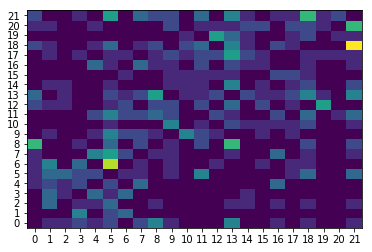

In [54]:
import matplotlib.pyplot as plt
plt.pcolor(df)
plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)
plt.show()

In [60]:
from symbulate import *

In [100]:
counter = [0 for i in range(0,22)] 
for i in range(1000):
    next_movie = 18
    for j in range(10):
        next_movie = BoxModel(list(range(0,22)), probs=df2.iloc[next_movie], size=1).draw()
    counter[next_movie] = counter[next_movie] + 1
print(counter)

[53, 46, 45, 44, 38, 53, 49, 59, 45, 33, 40, 44, 34, 67, 41, 37, 34, 48, 58, 40, 43, 49]


In [91]:
next_movie = 1
for j in range(20):
    next_movie = BoxModel(list(range(0,22)), probs=df2.iloc[next_movie], size=1).draw()
    print("Step",j + 1," ",movie_links[next_movie])

Step 1   Spider-Man:_Homecoming
Step 2   Black_Panther_(film)
Step 3   Ant-Man_(film)
Step 4   Black_Panther_(film)
Step 5   Ant-Man_and_the_Wasp
Step 6   Thor_(film)
Step 7   The_Avengers_(2012_film)
Step 8   Avengers:_Endgame
Step 9   Thor:_Ragnarok
Step 10   Iron_Man_2
Step 11   Avengers:_Endgame
Step 12   Avengers:_Infinity_War
Step 13   Captain_Marvel_(film)
Step 14   Iron_Man_2
Step 15   Spider-Man:_Homecoming
Step 16   Avengers:_Infinity_War
Step 17   Captain_America:_The_First_Avenger
Step 18   Ant-Man_and_the_Wasp
Step 19   Captain_America:_Civil_War
Step 20   Avengers:_Infinity_War


In [97]:
df

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,2,3,3,4,3,4,2,4,6,3,...,2,6,2,2,3,2,3,2,2,3
1,2,2,2,6,2,4,5,2,2,2,...,2,2,2,2,2,2,2,2,2,2
2,2,5,2,3,3,5,2,2,3,2,...,2,3,3,2,3,2,3,2,2,3
3,2,5,3,2,5,3,5,2,2,2,...,2,2,3,2,2,2,2,2,2,2
4,3,4,3,4,2,4,2,5,2,2,...,2,2,2,2,5,2,2,2,2,2
5,3,5,5,4,4,2,3,3,2,3,...,2,2,2,2,2,3,5,2,2,5
6,3,6,2,5,2,10,2,3,2,3,...,3,2,2,3,2,3,3,2,2,2
7,3,2,2,2,6,7,4,2,3,3,...,2,3,2,2,5,2,3,2,2,3
8,8,2,2,3,2,5,2,4,2,3,...,2,8,2,2,2,2,4,2,2,4
9,2,3,2,2,3,6,4,4,3,2,...,3,2,2,3,2,3,2,2,2,2
